<a href="https://colab.research.google.com/github/vishakhac24/DS/blob/main/Stock_Market_Prediction_and_Forecasting_using_stacked_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

Load the Data file

In [3]:
dataset_link= "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
data = pd.read_csv(dataset_link)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


NULL Values: 

In [4]:
data.isnull().sum()
# Check that there are no NULL values so that we can proceed

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

Analysis of Data

In [30]:
import numpy as np

In [34]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [35]:
data['Date'] = pd.to_datetime(data['Date'])

In [36]:
data.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [37]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [38]:
len(data)

2035

In [39]:
data_close = data['Close']
data_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [40]:
data.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [41]:
data['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

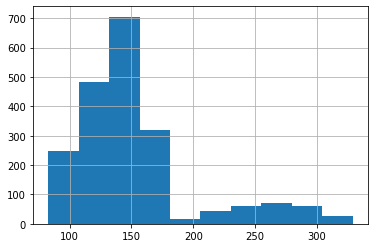

In [42]:
data['High'].hist()

In [43]:
data= data.sort_values('Date')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [44]:
data.reset_index(inplace=True)

Data Visualization

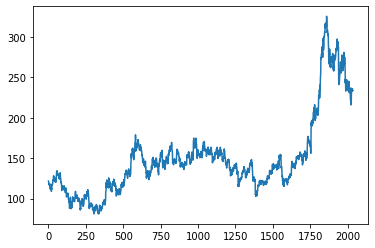

In [46]:
plt.plot(data['Close'])

In [47]:
Scaler = MinMaxScaler(feature_range=(0,1))

In [52]:
data_close = Scaler.fit_transform(np.array(data_close).reshape(-1,1))
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Scaling and Transformation is complete

In [57]:
training_size = int(len(data_close)*0.70)
test_size = len(data_close) - training_size
train , test = data_close[0: training_size,:], data_close[training_size : len(data_close), :1]

In [58]:
# Converting the previously calculated array values into a matrix
def create_mat(ds, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(ds)-time_step-1):
    a = ds[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(ds[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [59]:
time_step = 100
X_train, y_train = create_mat(train, time_step)
X_test, y_test = create_mat(test, time_step)

In [60]:
y_train.shape

(1323,)

In [61]:
X_train.shape

(1323, 100)

In [62]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

LSTM Model of Data

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train, y_train, validation_split=0.1, epochs= 60, batch_size= 64, verbose = 1)

Epoch 1/60
19/19 [==============================] - 19s 443ms/step - loss: 0.0339 - val_loss: 0.0011
Epoch 2/60
19/19 [==============================] - 7s 342ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 3/60
19/19 [==============================] - 4s 184ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 4/60
19/19 [==============================] - 4s 194ms/step - loss: 0.0016 - val_loss: 9.8498e-04
Epoch 5/60
19/19 [==============================] - 3s 179ms/step - loss: 0.0015 - val_loss: 9.5338e-04
Epoch 6/60
19/19 [==============================] - 4s 195ms/step - loss: 0.0014 - val_loss: 9.3232e-04
Epoch 7/60
19/19 [==============================] - 4s 198ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 4s 186ms/step - loss: 0.0015 - val_loss: 8.7306e-04
Epoch 9/60
19/19 [==============================] - 4s 192ms/step - loss: 0.0013 - val_loss: 8.6076e-04
Epoch 10/60
19/19 [==============================] - 4s 218ms/step - loss: 0.00

PREDICTION

In [68]:
predictions = model.predict(X_test)

In [70]:
# Inverse transform on predictions
inv_predictions = Scaler.inverse_transform(predictions)

In [71]:
inv_predictions

array([[130.34372 ],
       [129.73813 ],
       [128.69391 ],
       [127.21181 ],
       [125.56197 ],
       [124.13269 ],
       [123.35679 ],
       [122.45914 ],
       [121.69127 ],
       [121.3938  ],
       [121.312164],
       [121.06618 ],
       [120.45862 ],
       [119.59629 ],
       [118.786575],
       [118.26615 ],
       [117.98344 ],
       [117.73254 ],
       [117.80056 ],
       [118.29759 ],
       [119.003006],
       [119.784096],
       [120.34294 ],
       [120.4209  ],
       [120.07493 ],
       [119.62082 ],
       [119.03611 ],
       [117.90062 ],
       [116.30459 ],
       [114.55004 ],
       [112.826965],
       [111.23939 ],
       [109.992714],
       [109.31682 ],
       [109.01147 ],
       [109.15398 ],
       [109.90444 ],
       [110.9518  ],
       [112.11853 ],
       [112.95129 ],
       [113.23273 ],
       [112.82408 ],
       [111.8772  ],
       [110.78651 ],
       [109.967316],
       [109.5179  ],
       [109.59304 ],
       [110.1

Mean squared error for the model

In [72]:
import math
from sklearn.metrics import mean_squared_error

In [74]:
mse = math.sqrt(mean_squared_error(y_test,predictions))
print("The Mean Squared error for the model is: ", mse)

The Mean Squared error for the model is:  0.020623442370287633


In [75]:
math.sqrt(mean_squared_error(y_test, predictions))

0.020623442370287633

In [77]:
temp_input = list(X_test)
temp_input= temp_input[0].tolist()

In [79]:
temp_input

[[0.32148692810457513],
 [0.32352941176470584],
 [0.32557189542483667],
 [0.32638888888888884],
 [0.33496732026143783],
 [0.34395424836601307],
 [0.34415849673202614],
 [0.3459967320261438],
 [0.3586601307189542],
 [0.3558006535947713],
 [0.372140522875817],
 [0.3629493464052288],
 [0.37540849673202614],
 [0.36315359477124176],
 [0.3464052287581699],
 [0.3457924836601307],
 [0.34844771241830064],
 [0.357843137254902],
 [0.3472222222222222],
 [0.33353758169934633],
 [0.3353758169934641],
 [0.3368055555555556],
 [0.3368055555555556],
 [0.32271241830065356],
 [0.32638888888888884],
 [0.3188316993464052],
 [0.33986928104575165],
 [0.3776552287581699],
 [0.3999183006535948],
 [0.36968954248366004],
 [0.3588643790849674],
 [0.3592728758169935],
 [0.3529411764705882],
 [0.3210784313725491],
 [0.31413398692810457],
 [0.3174019607843137],
 [0.3159722222222222],
 [0.32209967320261446],
 [0.2826797385620915],
 [0.2849264705882353],
 [0.27389705882352944],
 [0.2877859477124183],
 [0.30187908496732